Data processing: get a .csv file from *finance.yahoo.com*;
Example stock: https://finance.yahoo.com/quote/NOK/history?p=NOK;
I used 5 year time periods

In [ ]:
import pandas as pd

#Upload '.csv' file of any stock and input it here* in this case, we use "NOK.csv"
df = pd.read_csv("AAPL.csv")
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')

data = df[['Date', 'Close']].copy()


data['Year'] = ""
data['Month'] = ""
data['Week'] = ""
data['Day'] = ""
data['7DAYS'] = ""
data['5DAYS'] = ""

# Create features from date and create moving averages of 7 & 5 days
for i in range(len(data)):
    data.at[i, 'Year'] = data['Date'][i].year
    data.at[i, 'Month'] = data['Date'][i].month
    data.at[i, 'Week'] = data['Date'][i].week
    data.at[i, 'Day'] = data['Date'][i].day
    if i >= 7:
        seven_avg = 0
        for j in range(1, 8):
            seven_avg += data.at[i-j, 'Close']
        data.at[i, '7DAYS'] = seven_avg/7
    else:
        data.at[i, '7DAYS'] = data.at[i, 'Close']
    if i >= 5:
        five_avg = 0
        for j in range(1, 6):
            five_avg += data.at[i-j, 'Close']
        data.at[i, '5DAYS'] = five_avg/5
    else:
        data.at[i, '5DAYS'] = data.at[i, 'Close']
        
        
# 1000 : 258

x_train = data.drop(['Close', 'Date'], axis = 1)[:1000]
y_train = data['Close'][:1000]

#Drop moving average from test data because we will need to create new average on every prediction
x_test = data.drop(['Close', 'Date', '7DAYS', '5DAYS'], axis = 1)[1000:]
y_test = data['Close'][1000:]

x_test['7DAYS'] = ""
x_test['5DAYS'] = ""

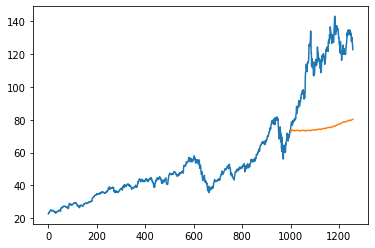

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Create moving averages based on past closing prices and predicts price for day
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(linear_model.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))

Mean Absolute Error: 39.37526919338307
Root Mean Squared Error: 42.574053113485185
R2 Score: -4.9278000985175545


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
# KNN
rmse = []
#find best rmse
for i in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_preds = knn_model.predict(x_train)
    rmse.append(np.sqrt(np.mean(np.power((np.array(y_train)-np.array(knn_preds)),2))))
print(rmse)

[0.0, 0.4788750160827767, 0.5962097578653227, 0.6901112684134126, 0.7411635711788741, 0.8407740377454774, 0.9403983169978343, 1.0334412653030403, 1.1215634919293218, 1.192176873298183, 1.253077223455194, 1.3037680532868912, 1.3543864963222563, 1.3991830486957684, 1.4394305942689254, 1.4685724845500816, 1.495654760514078, 1.5207893245028434, 1.5312354249642592, 1.5509653470500284, 1.5645120990493793, 1.584813048260295, 1.6091792639906595, 1.6213662905192545, 1.6480990264190105, 1.6600354329326827, 1.6697482369620484, 1.6858784846369383, 1.6966846076256106]


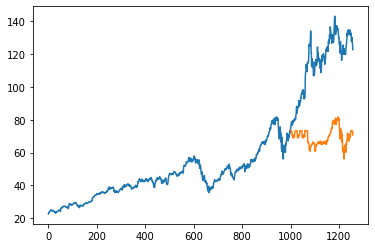

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#k = 1 where rmse was found to be: 0.097
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train, y_train)

#Create moving averages based on past closing prices
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(knn_model.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))

Mean Absolute Error: 44.99924381007752
Root Mean Squared Error: 48.439771126687674
R2 Score: -6.673751288746586


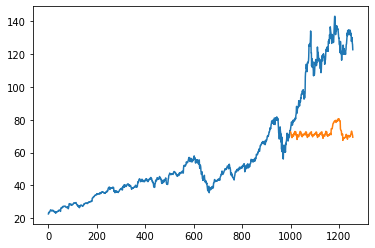

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(x_train, y_train);

#Create moving averages based on past closing prices
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(rf.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))


Mean Absolute Error: 42.69698085151164
Root Mean Squared Error: 45.83490710972934
R2 Score: -5.870625318423392
